In [350]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [351]:
import numpy as np
import h5py
from ast import literal_eval
from chainconsumer import ChainConsumer
from glob import glob

In [352]:
truth = 'VpeakSHAM'
#model = 'HOD'
rmin = str(1.0)
fnames = glob('/u/ki/swmclau2/des/SherlockPearceMCMC/{truth}_xi_gg_rmin_{rmin}_*.hdf5'.format(truth=truth, rmin=rmin))

In [353]:
fnames

['/u/ki/swmclau2/des/SherlockPearceMCMC/VpeakSHAM_xi_gg_rmin_1.0_CorrAB.hdf5',
 '/u/ki/swmclau2/des/SherlockPearceMCMC/VpeakSHAM_xi_gg_rmin_1.0_HOD.hdf5',
 '/u/ki/swmclau2/des/SherlockPearceMCMC/VpeakSHAM_xi_gg_rmin_1.0_HSAB.hdf5']

In [354]:
f = h5py.File(fnames[0], 'r') # get info from first box

In [355]:
f.attrs.keys()

[u'emu_type',
 u'training_file',
 u'fixed_params',
 u'emu_hps',
 u'true_data_fname',
 u'true_cov_fname',
 u'sim',
 u'obs',
 u'cov',
 u'nsteps',
 u'param_names',
 u'nwalkers',
 u'nburn',
 u'seed',
 u'chain_fixed_params']

In [356]:
n_walkers = f.attrs['nwalkers']
n_steps = f.attrs['nsteps']
n_burn = 5000#f.attrs['nburn']

In [357]:
sim_info = literal_eval(f.attrs['sim'])

In [358]:
chain_param_names = f.attrs['param_names']

In [359]:
f.close()

In [360]:
n_params = len(chain_param_names)

In [361]:
chain_param_names

array(['ombh2', 'omch2', 'w0', 'ns', 'ln10As', 'H0', 'Neff',
       'mean_occupation_centrals_assembias_corr1',
       'mean_occupation_satellites_assembias_corr1', 'logM1', 'logM0',
       'sigma_logM', 'alpha'], dtype='|S42')

In [362]:
model_names = ['CorrAB', 'HOD', 'HSAB']

hod_names = [r'$\Omega_b h^2$', r'$\Omega_c h^2$', r'$w_0$',  r'$n_s$', r'$\ln(10A_s)$', r'$H_0$',  r'$N_{eff}$',\
        r'$\log(M_0)$',  r'$\sigma_{\log M }$', r'$\log(M_1)$',  r'$\alpha$']
hsab_names = [r'$\Omega_b h^2$', r'$\Omega_c h^2$', r'$w_0$',  r'$n_s$', r'$\ln(10A_s)$', r'$H_0$',  r'$N_{eff}$',\
      '$\mathcal{A}_{sat}$',r'$\mathcal{A}_{cen}$', r'$\log(M_1)$',r'$\log(M_0)$', r'$\sigma_{\log M }$',r'$\alpha$']
corrab_names = [r'$\Omega_b h^2$', r'$\Omega_c h^2$', r'$w_0$',  r'$n_s$', r'$\ln(10A_s)$', r'$H_0$',  r'$N_{eff}$',\
      '$\rho_{sat}$',r'$\rho_{cen}$', r'$\log(M_1)$',r'$\log(M_0)$', r'$\sigma_{\log M }$',r'$\alpha$' ]
    
param_name_list = [corrab_names, hod_names, hsab_names]


In [363]:
hod_param_names = param_names[7:]
cosmo_param_names = param_names[:7]

In [364]:
c = ChainConsumer()

In [365]:
#chain_names = [r'$r_{min}$ = 1.0',r'$r_{min}$ = 10.0',r'$r_{min}$ = 0.0' ]
for r, fname in enumerate(sorted(fnames)):
    if r == 0: #skip CorrAB
         continue
    print r,
    f = h5py.File(fname, 'r')
    try:
        chain = f['chain'][n_walkers*n_burn:]
        print chain.shape[0]/n_walkers
        c.add_chain(f['chain'][n_walkers*n_burn:], parameters=param_name_list[r], walkers = n_walkers, name = model_names[r])
    except IOError:
        pass
        
    f.close()

1 5000
2 5000


In [366]:
c.configure(statistics='cumulative')

In [367]:
sim_info

{'gal_type': 'SHAM',
 'halo_property': 'halo_vpeak',
 'min_ptcl': 100,
 'nd': '5e-4',
 'scale_factor': 1.001,
 'scatter': 0.2,
 'sim_hps': {'system': 'sherlock'},
 'simname': 'ds_14_b_sub'}

In [369]:
h = 0.6881
cosmo_true_vals = np.array([0.02214, 0.1175, -1, 0.9676, 3.0819, h*100, 3.04]) #darksky

/u/ki/swmclau2/.conda/envs/hodemulator/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


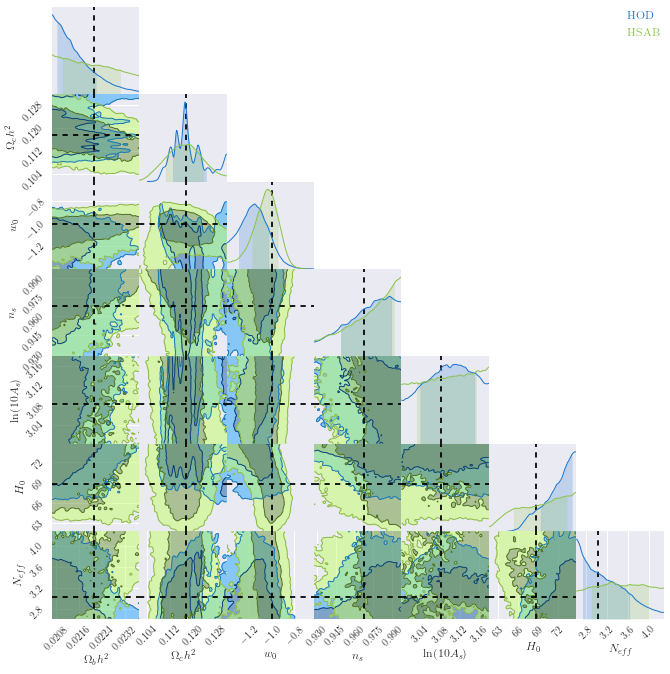

In [370]:
fig = c.plotter.plot(figsize=(10,10), parameters = cosmo_param_names, truth = cosmo_true_vals)# parameters = [param_names[i] for i in (1, 4)])
                    #, truth = true_vals)
fig.show()

/u/ki/swmclau2/.conda/envs/hodemulator/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


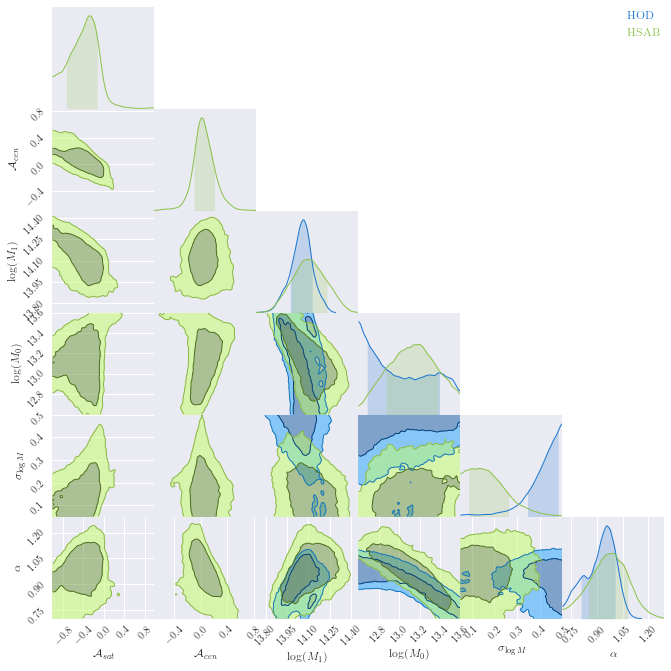

In [371]:
fig = c.plotter.plot(figsize=(10,10), parameters = hsab_names[7:])#, truth = hod_true_vals)# parameters = [param_names[i] for i in (1, 4)])
                    #, truth = true_vals)
fig.show()

/u/ki/swmclau2/.conda/envs/hodemulator/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


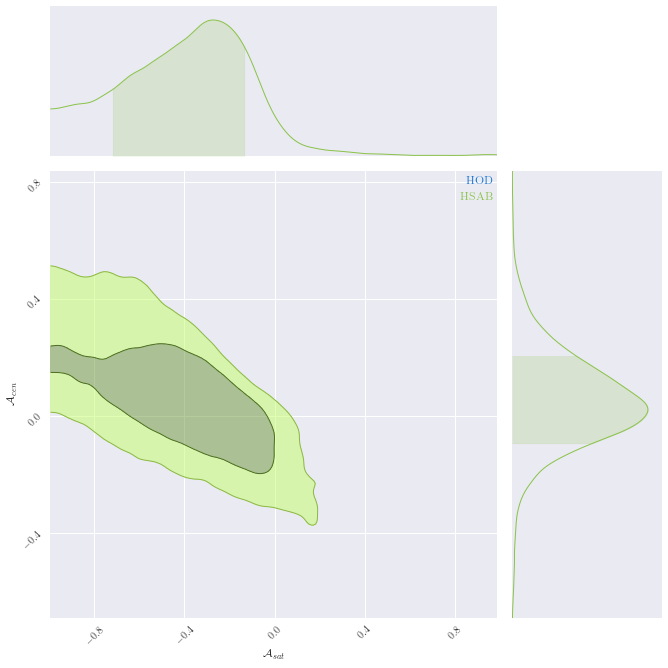

In [372]:
fig = c.plotter.plot(figsize=(10,10), parameters = hsab_names[7:9])#, truth = hod_true_vals)# parameters = [param_names[i] for i in (1, 4)])
                    #, truth = true_vals)
fig.show()

In [ ]:
#c.configure(statistics='max')
fig = c.plotter.plot_distributions(figsize=(10, 3) ,parameters = hod_param_names, truth = hod_true_vals)
fig.show()

In [ ]:
#c.configure(statistics='max')
fig = c.plotter.plot_distributions(figsize=(10, 6) , parameters = cosmo_param_names, truth = cosmo_true_vals)
fig.show()

In [ ]:
gelman_rubin_converged = c.diagnostic.gelman_rubin()
print gelman_rubin_converged

In [ ]:
np.sqrt(np.diag(c.analysis.get_covariance()[1]))

In [ ]:
summary  = c.analysis.get_summary()
for key, val in summary.iteritems():
    print key, val[1]

In [ ]:
MAP = np.array([summary[p][1] for p in param_names])
print MAP

In [ ]:
print param_names